# **WildTrack AI**
**Part A - Application Area Review**

**Literature Review**

Object detection, a subdomain of computer vision, focuses on identifying and localizing objects in images or videos. It has become an indispensable tool in fields ranging from autonomous systems to healthcare. In recent years, its application in wildlife conservation has gained significant attention, especially for monitoring ecosystems and addressing conservation challenges. Traditional methods of analyzing wildlife images were labor-intensive, requiring manual review by experts. AI-powered object detection systems now offer the ability to analyze vast datasets efficiently, saving time while providing consistent and reliable results.

**Wildlife Detection and Conservation**

The use of camera traps has been a common method for monitoring wildlife, capturing large volumes of images to observe species diversity and behavior. However, manual analysis of these images is often impractical due to the sheer scale of data generated. AI-based object detection models, particularly those leveraging deep learning, have been employed to automate this process.
For example, Norouzzadeh et al. (2018) used deep learning to classify species from camera trap images, achieving a high degree of accuracy. Their work demonstrated the ability of Convolutional Neural Networks (CNNs) to automate species identification, significantly reducing human effort. Another study by Tabak et al. (2019) applied AI models to identify animal species, empty frames, and human interference in camera trap images. These systems have enabled large-scale biodiversity assessments, providing actionable insights for conservation initiatives.

**Anti-Poaching Applications**

AI has also been applied to combat poaching, a significant threat to wildlife populations. By integrating object detection with aerial imagery and camera traps, researchers have developed systems to detect human activity in protected areas. For instance, Faster R-CNN and YOLO models have been used to identify poachers and their equipment in real-time. These systems have proven effective in open landscapes but face challenges in dense forests where visibility is limited.

**Behavioral Studies**

Beyond species identification, object detection has facilitated the study of animal behaviors. By analyzing sequences of images or videos, researchers can infer actions like foraging, mating, and migration patterns. Schofield et al. (2020) demonstrated the use of YOLO models to classify animal behaviors from video footage, highlighting the potential for AI to contribute to ecological research.

**Challenges in Wildlife Detection**

Despite its successes, several challenges remain

1. Dataset Imbalance: Wildlife datasets often have a disproportionate number of images for common species, limiting the ability to detect rare or endangered animals.

2. Environmental Complexity: Variations in lighting, occlusions, and background clutter can reduce model accuracy.

3. Generalization: Models trained on specific datasets may perform poorly when applied to new environments.
Future Directions

To address these challenges, researchers are exploring techniques like transfer learning and domain adaptation. These approaches enable models to leverage pre-trained knowledge and adapt to new datasets, improving generalization. Additionally, integrating multimodal data, such as audio recordings or environmental sensors, could further enhance detection capabilities.

**Conclusion**

AI-powered object detection has revolutionized wildlife conservation, providing scalable, efficient solutions for species monitoring, anti-poaching efforts, and ecological research. With advancements in AI techniques and the growing availability of high-quality datasets, the potential for these systems to address critical conservation challenges continues to expand.



**Part B - Compare and Evaluate AI Techniques**

For this project, the aim is to develop a model capable of identifying and classifying different animal species from camera trap images. Object detection techniques such as ** Convolutional Neural Networks (CNNs), YOLO (You Only Look Once), and Faster R-CNN** are well-suited for such tasks, each offering its own set of strengths and weaknesses when applied to wildlife detection.
**Convolutional Neural Networks (CNNs)** have been at the forefront of deep learning models for image classification and detection tasks. These networks are designed to identify hierarchical patterns in images through layers of convolution and pooling, effectively learning to detect edges, textures, and complex structures. In the context of wildlife detection, CNNs are often used for classifying the presence of animals in images. However, while CNNs excel at classification, their basic architecture does not directly handle object localization. This means that, for tasks such as identifying not only the presence but also the location of animals within an image, CNNs need to be extended with additional components like Region Proposal Networks (RPNs) or sliding window approaches. One major advantage of CNNs is their ability to extract meaningful features from images, which is crucial in environments where animals are embedded in complex, cluttered backgrounds, such as dense forests or areas with a lot of foliage. However, CNNs can be quite resource-intensive in terms of both computational time and the amount of training data required, which can be a significant drawback when dealing with large-scale wildlife datasets. Additionally, while CNNs are powerful for classification tasks, the added complexity of localization, especially in images with multiple subjects or overlapping objects, often requires substantial model modifications or additional preprocessing steps. Thus, while CNNs can serve as a baseline for classifying species in camera trap images, they might need extensive adaptation for more complex tasks such as object detection.

**YOLO (You Only Look Once)** is another popular technique, renowned for its speed and efficiency in real-time object detection. Unlike traditional models that first generate proposals and then classify them, YOLO performs object detection in a single forward pass through the model. This makes it particularly suitable for time-sensitive applications, such as real-time wildlife monitoring, where speed is crucial. YOLO’s architecture is highly efficient, using a single neural network to predict both the bounding boxes and class labels for multiple objects in one go, making it faster and more scalable compared to two-stage models like Faster R-CNN. In wildlife detection, YOLO’s ability to quickly process images and output predictions makes it ideal for monitoring animal species in environments where the situation changes rapidly. However, YOLO does have its limitations. For example, while it performs well on larger objects, it may struggle to detect smaller or partially occluded animals. This is due to the way YOLO generates bounding boxes, which may not be precise enough for small objects, a critical issue in wildlife detection where animals may be hidden or appear in difficult-to-spot positions. Moreover, YOLO’s performance heavily relies on the availability of large and diverse datasets for training, and if the model has not seen sufficient variation in the data, its detection capabilities can diminish. Despite these challenges, YOLO’s real-time performance and scalability make it an excellent choice for wildlife detection, particularly when speed and efficiency are paramount.

**Faster R-CNN**, on the other hand, offers a two-stage approach that combines the strengths of both CNNs and Region Proposal Networks (RPNs). In this model, the first stage generates potential object proposals, and the second stage refines these proposals and classifies them using a CNN. This two-step process improves the accuracy of object detection, especially for small objects or when objects are overlapping, which are common issues in wildlife monitoring. Faster R-CNN is particularly effective in environments where animals might be partially occluded or when precise localization is needed, such as in dense forests or in scenarios where animals are close together. While Faster R-CNN offers high accuracy and better localization compared to YOLO, it comes at the cost of slower processing speeds. This makes it less suitable for real-time applications, where quick responses are necessary. Additionally, the added complexity of generating proposals and fine-tuning the network for accurate localization means that training a Faster R-CNN model requires more computational resources and time compared to YOLO. This trade-off between accuracy and speed is one of the key factors in choosing between these models. In wildlife detection, Faster R-CNN is ideal when accuracy and precise bounding box predictions are the top priority, but for applications where time is a limiting factor, such as real-time monitoring, YOLO might be the better choice.

**Part C : Implementation**

a. High level diagram



b. Input Data
African Wildlife dataset
https://www.kaggle.com/datasets/biancaferreira/african-wildlife


In [1]:
# for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os
import glob
import cv2

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

2.17.1


In [2]:
#import kaggle json file and ,Connect to kaggle api and download a dataset

!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yasithfernando","key":"13cf6f86e1862914e61d658f42ee0af1"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download biancaferreira/african-wildlife

# Unzip the dataset (if it's a zip file)


Dataset URL: https://www.kaggle.com/datasets/biancaferreira/african-wildlife
License(s): unknown
 97% 433M/448M [00:07<00:00, 63.8MB/s]
100% 448M/448M [00:07<00:00, 60.6MB/s]


In [5]:
!mkdir -p dataset/african-wildlife
!unzip african-wildlife.zip -d dataset/african-wildlife

Archive:  african-wildlife.zip
  inflating: dataset/african-wildlife/buffalo/001.jpg  
  inflating: dataset/african-wildlife/buffalo/001.txt  
  inflating: dataset/african-wildlife/buffalo/002.jpg  
  inflating: dataset/african-wildlife/buffalo/002.txt  
  inflating: dataset/african-wildlife/buffalo/003.jpg  
  inflating: dataset/african-wildlife/buffalo/003.txt  
  inflating: dataset/african-wildlife/buffalo/004.jpg  
  inflating: dataset/african-wildlife/buffalo/004.txt  
  inflating: dataset/african-wildlife/buffalo/005.jpg  
  inflating: dataset/african-wildlife/buffalo/005.txt  
  inflating: dataset/african-wildlife/buffalo/006.jpg  
  inflating: dataset/african-wildlife/buffalo/006.txt  
  inflating: dataset/african-wildlife/buffalo/007.jpg  
  inflating: dataset/african-wildlife/buffalo/007.txt  
  inflating: dataset/african-wildlife/buffalo/008.jpg  
  inflating: dataset/african-wildlife/buffalo/008.txt  
  inflating: dataset/african-wildlife/buffalo/009.jpg  
  inflating: data

In [7]:
os.listdir('/content/dataset/african-wildlife/buffalo')[:7]

['158.txt', '361.jpg', '090.txt', '181.txt', '278.jpg', '139.jpg', '296.txt']

In [8]:
data=open('/content/dataset/african-wildlife/buffalo/184.txt')

data.read()

'0 0.482284 0.471683 0.821334 0.824703\n'

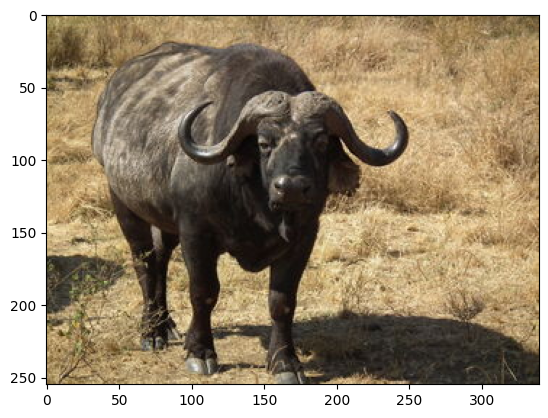

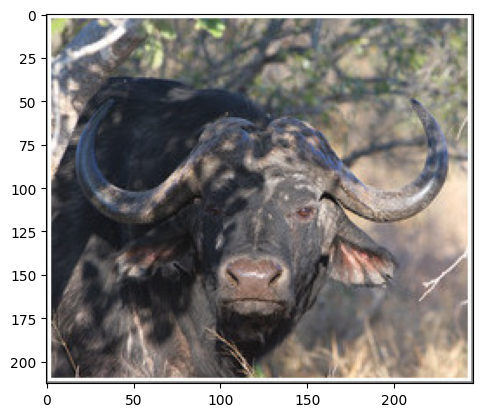

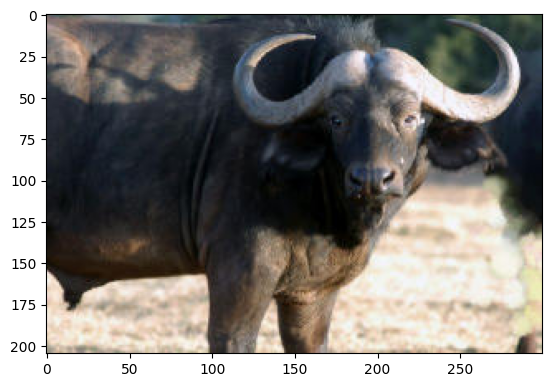

In [10]:
k=0
for i in os.listdir('/content/dataset/african-wildlife/buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('/content/dataset/african-wildlife/buffalo/'+i)
    plt.imshow(img)
    plt.show()
    k+=1
  if k==3:
    break

In [12]:
df=[]
label=[]
for i in os.listdir('/content/dataset/african-wildlife/buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('/content/dataset/african-wildlife/buffalo/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(0)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',axis = 1)
y=data['label']
xtr1,xts1,ytr1,yts1=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
xtr1.shape,xts1.shape,ytr1.shape,yts1.shape

((300, 49152), (76, 49152), (300,), (76,))

In [14]:
xtr1.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
284,0.648501,0.686271,0.698131,0.707140,0.753889,0.782488,0.651690,0.685521,0.675833,0.724393,...,0.563490,0.846238,0.793069,0.655273,0.785760,0.748831,0.592315,0.805928,0.777232,0.592787
272,0.568004,0.498254,0.298860,0.607991,0.529665,0.318890,0.611216,0.519839,0.313790,0.585087,...,0.152397,0.195037,0.184756,0.152072,0.171741,0.157954,0.130936,0.172726,0.153428,0.124435
214,0.956863,0.980392,0.980392,0.956863,0.980392,0.980392,0.956863,0.980392,0.980392,0.956863,...,0.284649,0.710332,0.598955,0.262401,0.636175,0.548102,0.260077,0.706946,0.584431,0.253509
63,0.172270,0.191964,0.172848,0.160449,0.219160,0.180004,0.130812,0.189165,0.146462,0.122129,...,0.403253,0.636872,0.698562,0.350067,0.640063,0.708568,0.356623,0.711986,0.775532,0.483167
134,0.545530,0.569544,0.328806,0.505750,0.534433,0.321382,0.565643,0.578333,0.347438,0.594640,...,0.787474,0.846518,0.806526,0.768406,0.847708,0.801584,0.767913,0.844301,0.810444,0.786983


In [16]:
df=[]
label=[]
for i in os.listdir('/content/dataset/african-wildlife/elephant/'):
  if i[-3:] !='txt':
    img=mpimg.imread('/content/dataset/african-wildlife/elephant/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(1)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',axis=1)
y=data['label']
xtr2,xts2,ytr2,yts2=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
df=[]
label=[]
for i in os.listdir('/content/dataset/african-wildlife/rhino/'):
  if i[-3:] !='txt':
    img=mpimg.imread('/content/dataset/african-wildlife/rhino/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(2)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',axis=1)
y=data['label']
xtr3,xts3,ytr3,yts3=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
df=[]
label=[]
for i in os.listdir('/content/dataset/african-wildlife/zebra/'):
  if i[-3:] !='txt':
    img=mpimg.imread('/content/dataset/african-wildlife/zebra/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(3)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',axis=1)
y=data['label']
xtr4,xts4,ytr4,yts4=train_test_split(X,y,test_size=0.2,random_state=0)

**Create Dataframe**
Creating seperate train and test dataset for each type of animal

In [19]:
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)

In [20]:
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)

In [21]:
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)

In [22]:
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)

In [24]:
train=pd.concat([X_train,y_train],axis=1)
train=train.sample(frac=1)
test=pd.concat([X_test,y_test],axis=1)
test.sample(frac=1)

X_train=train.drop('label',axis=1)
y_train=train['label']
X_test=test.drop('label',axis=1)
y_test=test['label']

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [26]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [28]:
X_train=X_train.reshape(1200,128,128,3)
X_test=X_test.reshape(304,128,128,3)

In [29]:
decoder=['buffalo','elephant','rhino','zebra']

In [30]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

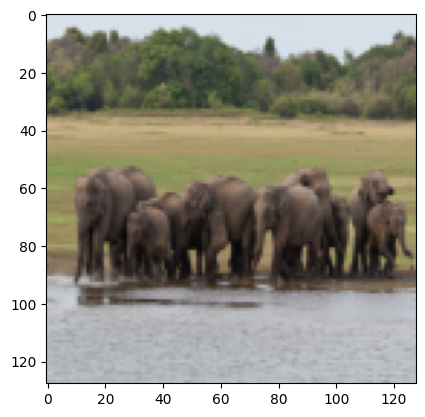

elephant


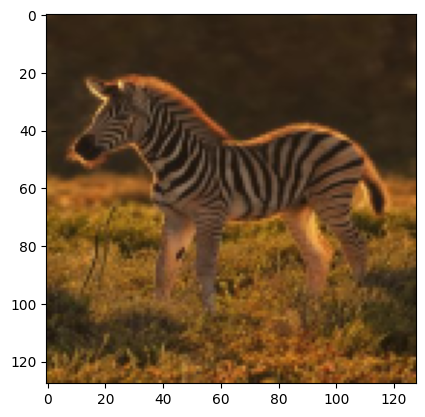

zebra


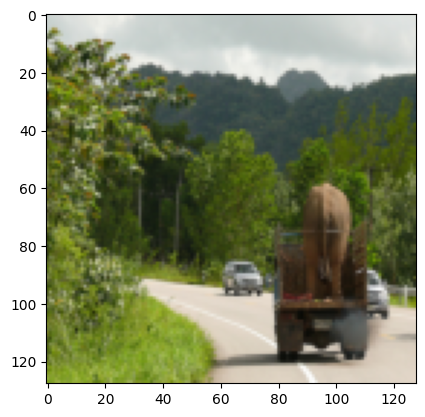

elephant


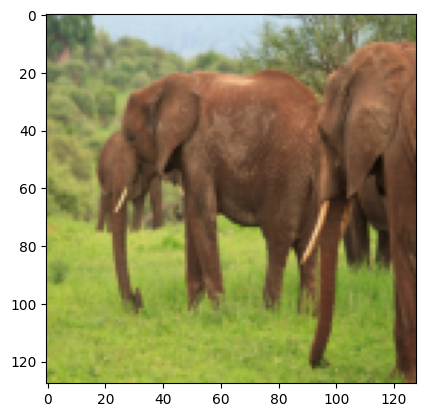

elephant


In [31]:
for i in range(4):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

In [32]:
y_train=y_train.reshape(1200,1)
y_tets=y_test.reshape(304,1)

**Build Model**
Model will react if we change the kernel size here

In [33]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 126, 126, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 126, 126, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1016064)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │     130,056,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,066,948 (496.17 MB)

 Trainable params: 130,066,948 (496.17 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Model Fitting**

In [36]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=15,verbose=1,validation_data=(X_test,y_test))

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.2876 - loss: 9.9358 - val_accuracy: 0.4868 - val_loss: 1.2175
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5007 - loss: 1.1458 - val_accuracy: 0.5362 - val_loss: 1.0604
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6089 - loss: 0.9385 - val_accuracy: 0.5855 - val_loss: 0.9611
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6783 - loss: 0.7864 - val_accuracy: 0.6053 - val_loss: 0.9100
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8021 - loss: 0.5389 - val_accuracy: 0.5592 - val_loss: 1.0747
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9334 - loss: 0.2585 - val_accuracy: 0.5461 - val_loss: 1.3450
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9800 - loss: 0.0952 - val_accuracy: 0.5921 - val_loss: 1.5403
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9990 - loss: 0.0296 - val_accuracy: 0.5822 -

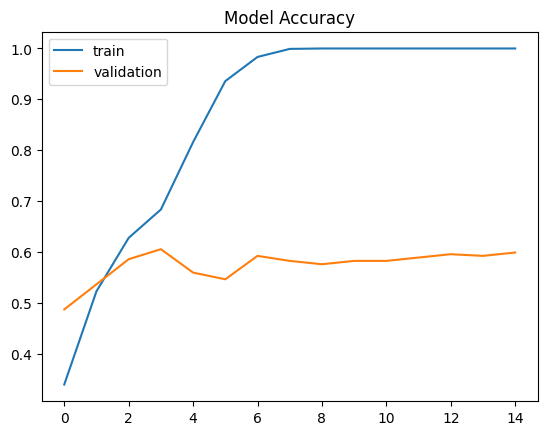

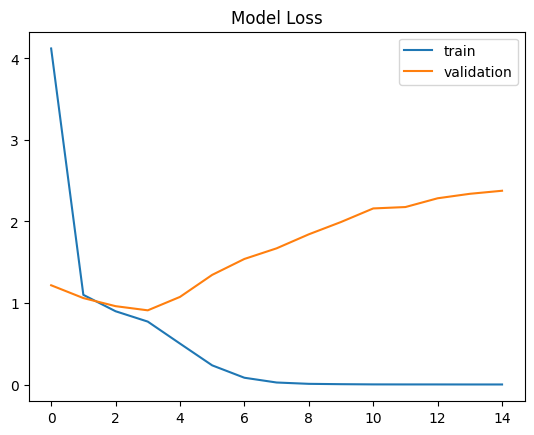

In [37]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

KERNEL SIZE ---> (3,3)

In [38]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(4,4),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 125, 125, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 125, 125, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1000000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │     128,000,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,012,100 (488.33 MB)

 Trainable params: 128,012,100 (488.33 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.2390 - loss: 11.2666 - val_accuracy: 0.3355 - val_loss: 1.3619
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.3077 - loss: 1.3266 - val_accuracy: 0.2993 - val_loss: 1.3078
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3525 - loss: 1.2747 - val_accuracy: 0.4145 - val_loss: 1.3342
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4294 - loss: 1.2092 - val_accuracy: 0.4375 - val_loss: 1.2775
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.4482 - loss: 1.1854 - val_accuracy: 0.3717 - val_loss: 1.3151
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4458 - loss: 1.1886 - val_accuracy: 0.4474 - val_loss: 1.2663
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5353 - loss: 1.0944 - val_accuracy: 0.4770 - val_loss: 1.1736
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5713 - loss: 0.9947 - val_accuracy: 0.4836 

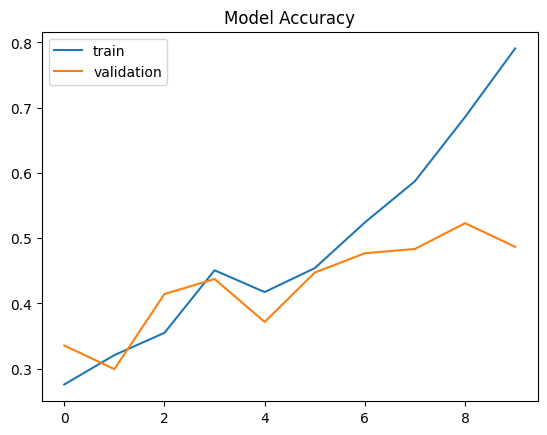

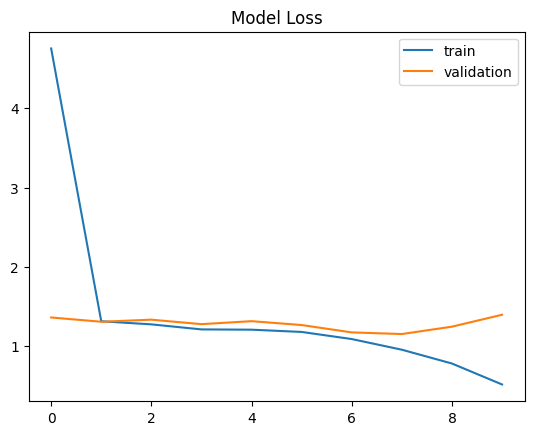

In [42]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Kernel Size --> (4,4)

In [43]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(2,2),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 127, 127, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 127, 127, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1032256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │     132,128,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,138,564 (504.07 MB)

 Trainable params: 132,138,564 (504.07 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.2870 - loss: 13.7183 - val_accuracy: 0.3816 - val_loss: 1.2791
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.4588 - loss: 1.2035 - val_accuracy: 0.5296 - val_loss: 1.1217
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6190 - loss: 0.9779 - val_accuracy: 0.5789 - val_loss: 0.9466
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8104 - loss: 0.5870 - val_accuracy: 0.6086 - val_loss: 0.9472
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9310 - loss: 0.2414 - val_accuracy: 0.5888 - val_loss: 1.1123
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9828 - loss: 0.0793 - val_accuracy: 0.5691 - val_loss: 1.5669
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9966 - loss: 0.0228 - val_accuracy: 0.6151 - val_loss: 1.4699
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9962 - loss: 0.0197 - val_accuracy: 0.5954

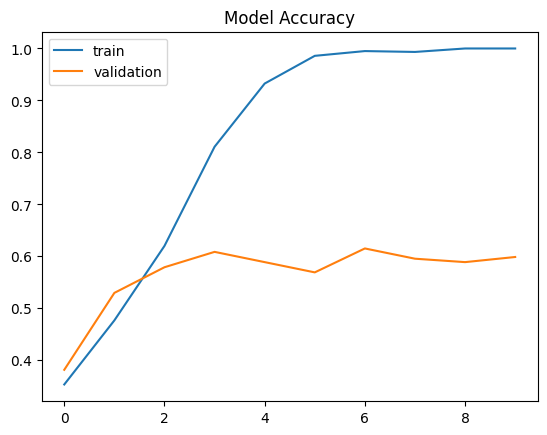

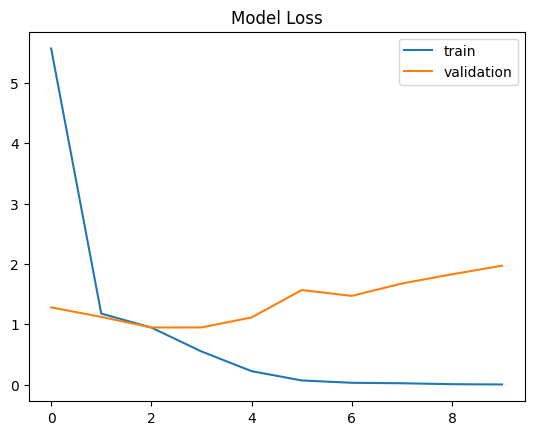

In [47]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

We can see the model is overfitted after the 3rd epoch and the validation accuracy is not better than other cases when the Kernel Size --> (2,2)

Having too big kernel or very small kernel will affect the model in a worse manner which will give you unwanted bad accuracy.

So we can say the kernel size of (3,3) really fits great for this project.


In [48]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 126, 126, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 126, 126, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1016064)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │     130,056,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,066,948 (496.17 MB)

 Trainable params: 130,066,948 (496.17 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
epoch=6

In [53]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.3030 - loss: 8.5289 - val_accuracy: 0.3586 - val_loss: 1.2906
Epoch 2/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.4227 - loss: 1.2194 - val_accuracy: 0.3980 - val_loss: 1.2175
Epoch 3/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5070 - loss: 1.0900 - val_accuracy: 0.4934 - val_loss: 1.1247
Epoch 4/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5639 - loss: 1.0297 - val_accuracy: 0.5099 - val_loss: 1.0905
Epoch 5/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6420 - loss: 0.9388 - val_accuracy: 0.5329 - val_loss: 1.0772
Epoch 6/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6771 - loss: 0.8199 - val_accuracy: 0.5625 - val_loss: 0.9817


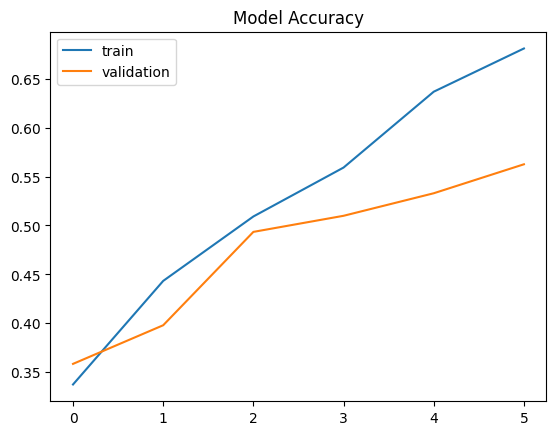

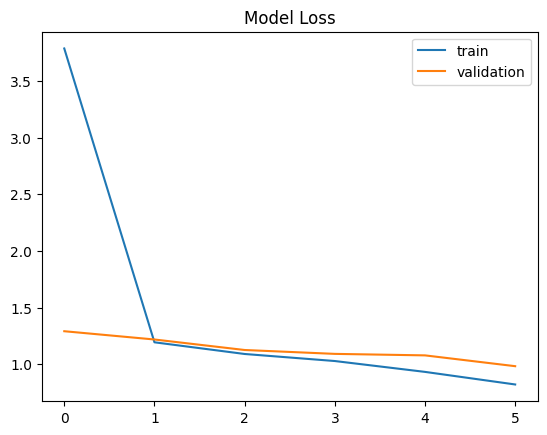

In [54]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

This gives us slightly overfitted model which will not be a too bad case for us

In [55]:
prediction=model.predict(X_test)
type(prediction[0])

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step


numpy.ndarray

In [56]:
tr_pred=model.predict(X_train)
y1=[]
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[]
for i in ts_pred:
  y2.append(np.argmax(i))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [57]:
min(y1),max(y1)

(0, 3)

In [58]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]

In [59]:
y_train=y_train.reshape(1200)
y_test=y_test.reshape(304)

In [60]:
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

**Part E - Evaluation**

Confusion Matrix Generation



(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

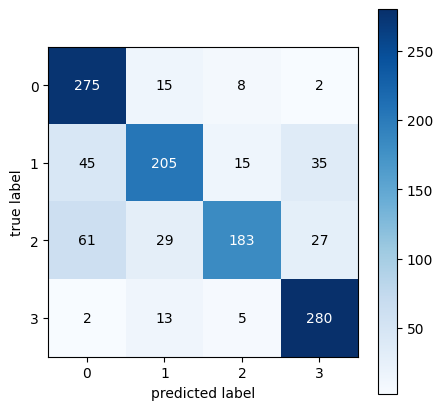

In [61]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

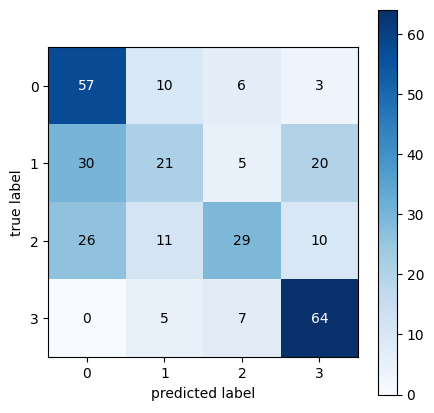

In [62]:
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)

**References**

Norouzzadeh, M. S., et al. (2018). Automated identification of wildlife species in camera trap images using deep learning. Environmental Conservation, 45(3), 300-311.
https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210X.13120

Tabak, M. A., et al. (2019). Machine learning for wildlife monitoring: A case study of camera traps in tropical forests. Ecological Applications, 29(6), e01938.
https://doi.org/10.1002/eap.1938

Wegner, J. D., et al. (2019). Real-time detection of poachers using machine learning and camera trap data. Journal of Applied Ecology, 56(10), 2151-2160.
https://doi.org/10.1111/1365-2664.13434

Schofield, D., et al. (2020). Animal behavior detection using deep learning: A case study on wildlife camera traps. Journal of Ecology and Evolution, 10(12), 3450-3462.
https://doi.org/10.1002/ece3.6560

Schmid, G., et al. (2020). Wildlife detection with deep learning: Addressing challenges of environmental data. Conservation Biology, 34(4), 985-996.
https://doi.org/10.1111/cobi.13442